In [49]:
import scipy.io as io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# unseen_dset = io.loadmat('get_unseen_fresh_samples/unseen_insect_dataset.mat')
seen_dset = io.loadmat('matlab_dataset/insect_dataset.mat')


## Read Seen Dataset

In [27]:
trainval_loc=np.concatenate([seen_dset['train_loc'].squeeze()-1,seen_dset['val_unseen_loc'].squeeze()-1,seen_dset['val_seen_loc'].squeeze()-1])
seen_dna_trainval_features = seen_dset['all_dna_features_cnn_new'][trainval_loc]
seen_gan_trainval_features = seen_dset['all_image_features_gan'][trainval_loc]
seen_trainval_labels= seen_dset['all_labels'].squeeze()[trainval_loc]-1
species2genus = seen_dset['species2genus'].squeeze()
seen_trainval_genus_labels = species2genus[seen_trainval_labels]

## Read Unseen Dataset


In [47]:
unseen_dna_features = unseen_dset['all_dna_features_cnn_new']
unseen_gan_features = unseen_dset['all_image_features_gan']
unseen_genus_labels= unseen_dset['all_genus_labels'].squeeze()

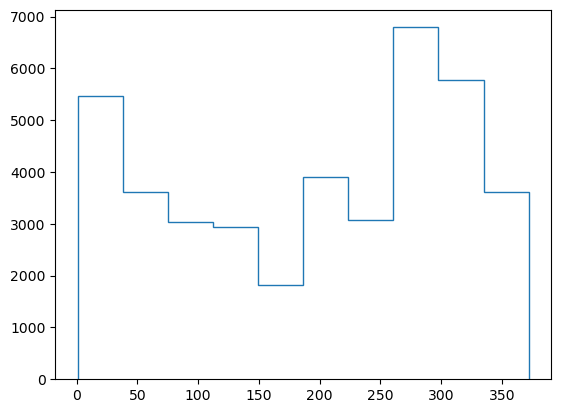

In [38]:
counts, bins = np.histogram(unseen_genus_labels)
plt.stairs(counts, bins)

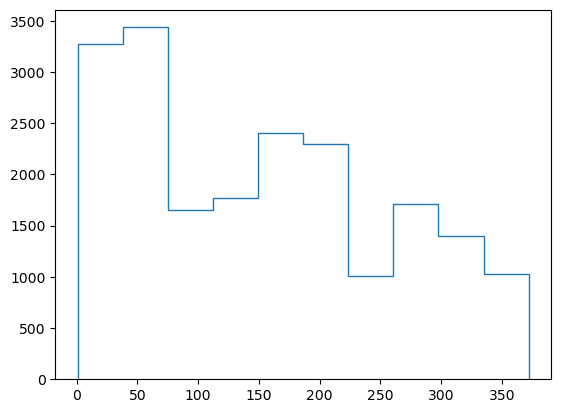

In [39]:
counts, bins = np.histogram(seen_trainval_genus_labels)
plt.stairs(counts, bins)


# Random Forests using genus labels

## Only DNA CNN NEW FEATURES using genus labels

In [60]:
clf = RandomForestClassifier(min_samples_leaf=2,n_jobs=-1)
clf = clf.fit(seen_dna_trainval_features, seen_trainval_genus_labels)
train_predicted_labels = clf.predict(seen_dna_trainval_features)
print(f"Training genus accuracy:{np.count_nonzero(train_predicted_labels==seen_trainval_genus_labels)/len(seen_trainval_genus_labels)}")

Training genus accuracy:0.999849954986496


In [61]:
val_predicted_labels= clf.predict(unseen_dna_features)
print(f"Validation genus accuracy:{np.count_nonzero(val_predicted_labels==unseen_genus_labels)/len(unseen_genus_labels)}")

Validation genus accuracy:0.24077403245942572


## Only GAN NEW FEATURES using genus labels

In [62]:
clf = RandomForestClassifier(min_samples_leaf=2,n_jobs=-1)
clf = clf.fit(seen_gan_trainval_features, seen_trainval_genus_labels)
train_predicted_labels = clf.predict(seen_gan_trainval_features)
print(f"Training genus accuracy:{np.count_nonzero(train_predicted_labels==seen_trainval_genus_labels)/len(seen_trainval_genus_labels)}")

Training genus accuracy:0.9986996098829649


In [63]:
val_predicted_labels= clf.predict(unseen_gan_features)
print(f"Validation genus accuracy:{np.count_nonzero(val_predicted_labels==unseen_genus_labels)/len(unseen_genus_labels)}")

Validation genus accuracy:0.06856429463171036


## DNA+GAN NEW FEATURES using genus labels

In [64]:
clf = RandomForestClassifier(min_samples_leaf=2,n_jobs=-1)
clf = clf.fit(np.concatenate([seen_dna_trainval_features,seen_gan_trainval_features],axis=1), seen_trainval_genus_labels)
train_predicted_labels = clf.predict(np.concatenate([seen_dna_trainval_features,seen_gan_trainval_features],axis=1))
print(f"Training genus accuracy:{np.count_nonzero(train_predicted_labels==seen_trainval_genus_labels)/len(seen_trainval_genus_labels)}")

Training genus accuracy:0.9999499849954987


In [65]:
val_predicted_labels= clf.predict(np.concatenate([unseen_dna_features,unseen_gan_features],axis=1))
print(f"Validation genus accuracy:{np.count_nonzero(val_predicted_labels==unseen_genus_labels)/len(unseen_genus_labels)}")

Validation genus accuracy:0.2486641697877653


# Random Forests using the top species' genus label

## Only DNA CNN NEW FEATURES using top species' labels

In [69]:
clf = RandomForestClassifier(min_samples_leaf=2,n_jobs=-1)
clf = clf.fit(seen_dna_trainval_features, seen_trainval_labels)
train_predicted_labels = clf.predict(seen_dna_trainval_features)
print(f"Training species accuracy:{np.count_nonzero(train_predicted_labels==seen_trainval_labels)/len(seen_trainval_labels)}")
print(f"Training genus accuracy:{np.count_nonzero(species2genus[train_predicted_labels]==seen_trainval_genus_labels)/len(seen_trainval_genus_labels)}")

Training species accuracy:0.9997999399819946
Training genus accuracy:1.0


In [70]:
val_predicted_labels= clf.predict(unseen_dna_features)
print(f"Validation genus accuracy:{np.count_nonzero(species2genus[val_predicted_labels]==unseen_genus_labels)/len(unseen_genus_labels)}")

Validation genus accuracy:0.14958801498127342
